In [9]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10

print("✅ Libraries berhasil diimport!")

✅ Libraries berhasil diimport!


In [10]:
# Cell 2: Cek ukuran file sebelum load
import os

file_path = r'C:\Users\Lenovo\Documents\TUGAS AKHIR\ieee-fraud-detection\train_transaction.csv'

# Cek ukuran file
file_size_bytes = os.path.getsize(file_path)
file_size_mb = file_size_bytes / (1024 * 1024)
file_size_gb = file_size_bytes / (1024 * 1024 * 1024)

print("📁 INFORMASI FILE")
print("=" * 60)
print(f"File: {os.path.basename(file_path)}")
print(f"Ukuran: {file_size_mb:.2f} MB ({file_size_gb:.2f} GB)")
print("=" * 60)

if file_size_mb > 500:
    print("⚠️  File sangat besar! Akan menggunakan strategi chunking.")
else:
    print("✅ File cukup kecil, bisa dimuat langsung.")

📁 INFORMASI FILE
File: train_transaction.csv
Ukuran: 651.69 MB (0.64 GB)
⚠️  File sangat besar! Akan menggunakan strategi chunking.


In [11]:
# Cell 3: Load HANYA kolom target untuk analisis class imbalance
# Ini jauh lebih hemat memory!

file_path = r'C:\Users\Lenovo\Documents\TUGAS AKHIR\ieee-fraud-detection\train_transaction.csv'

# Cek dulu nama kolom tanpa load semua data
column_names = pd.read_csv(file_path, nrows=0).columns.tolist()
print("📋 Kolom yang tersedia:")
print(column_names)
print(f"\nTotal kolom: {len(column_names)}")

📋 Kolom yang tersedia:
['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 

In [12]:
# Cell 4: Load HANYA kolom target (isFraud)
# Ini akan sangat cepat dan hemat memory!

target_column = 'isFraud'  # Kolom target untuk fraud detection

print(f"⏳ Loading kolom '{target_column}'...")

# Load hanya 1 kolom
df_target = pd.read_csv(
    file_path, 
    usecols=[target_column],  # Hanya load kolom ini
    dtype={target_column: 'int8'}  # Hemat memory dengan int8
)

print(f"✅ Berhasil dimuat!")
print(f"Shape: {df_target.shape}")
print(f"Memory usage: {df_target.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nPreview:")
display(df_target.head(10))

⏳ Loading kolom 'isFraud'...
✅ Berhasil dimuat!
Shape: (590540, 1)
Memory usage: 0.56 MB

Preview:


,isFraud
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [13]:
# Cell 5: Analisis distribusi kelas
y = df_target[target_column]

# Hitung distribusi
class_counts = y.value_counts().sort_index()
total_samples = len(y)

# Hitung persentase
class_percentages = (class_counts / total_samples * 100).round(2)

# Buat DataFrame hasil
distribution_df = pd.DataFrame({
    'Kelas': class_counts.index,
    'Label': ['Non-Fraud', 'Fraud'],  # Interpretasi
    'Jumlah': class_counts.values,
    'Persentase (%)': class_percentages.values
})

# Hitung rasio imbalance
max_count = class_counts.max()
min_count = class_counts.min()
imbalance_ratio = max_count / min_count

# Tentukan status
is_imbalanced = imbalance_ratio > 3

# Simpan hasil
results = {
    'distribution_df': distribution_df,
    'class_counts': class_counts,
    'total_samples': total_samples,
    'imbalance_ratio': imbalance_ratio,
    'is_imbalanced': is_imbalanced,
    'majority_class': class_counts.idxmax(),
    'minority_class': class_counts.idxmin()
}

# Tampilkan hasil
print("=" * 70)
print("🔍 HASIL ANALISIS CLASS IMBALANCE - IEEE FRAUD DETECTION")
print("=" * 70)
print(f"\nTotal Transaksi: {total_samples:,}")
print(f"Jumlah Kelas: {len(class_counts)}\n")

print("Distribusi Kelas:")
print("-" * 70)
display(distribution_df)

print("\n" + "-" * 70)
print(f"Kelas Mayoritas: {results['majority_class']} (Non-Fraud)")
print(f"  → {class_counts[results['majority_class']]:,} transaksi ({class_percentages[results['majority_class']]:.2f}%)")
print(f"\nKelas Minoritas: {results['minority_class']} (Fraud)")
print(f"  → {class_counts[results['minority_class']]:,} transaksi ({class_percentages[results['minority_class']]:.2f}%)")
print(f"\n⚖️  Rasio Imbalance: {imbalance_ratio:.2f}:1")
print(f"\n{'⚠️  STATUS: SEVERELY IMBALANCED!' if is_imbalanced else '✅ STATUS: BALANCED'}")
print("=" * 70)

🔍 HASIL ANALISIS CLASS IMBALANCE - IEEE FRAUD DETECTION

Total Transaksi: 590,540
Jumlah Kelas: 2

Distribusi Kelas:
----------------------------------------------------------------------


,Kelas,Label,Jumlah,Persentase (%)
0,0,Non-Fraud,569877,96.5
1,1,Fraud,20663,3.5



----------------------------------------------------------------------
Kelas Mayoritas: 0 (Non-Fraud)
  → 569,877 transaksi (96.50%)

Kelas Minoritas: 1 (Fraud)
  → 20,663 transaksi (3.50%)

⚖️  Rasio Imbalance: 27.58:1

⚠️  STATUS: SEVERELY IMBALANCED!


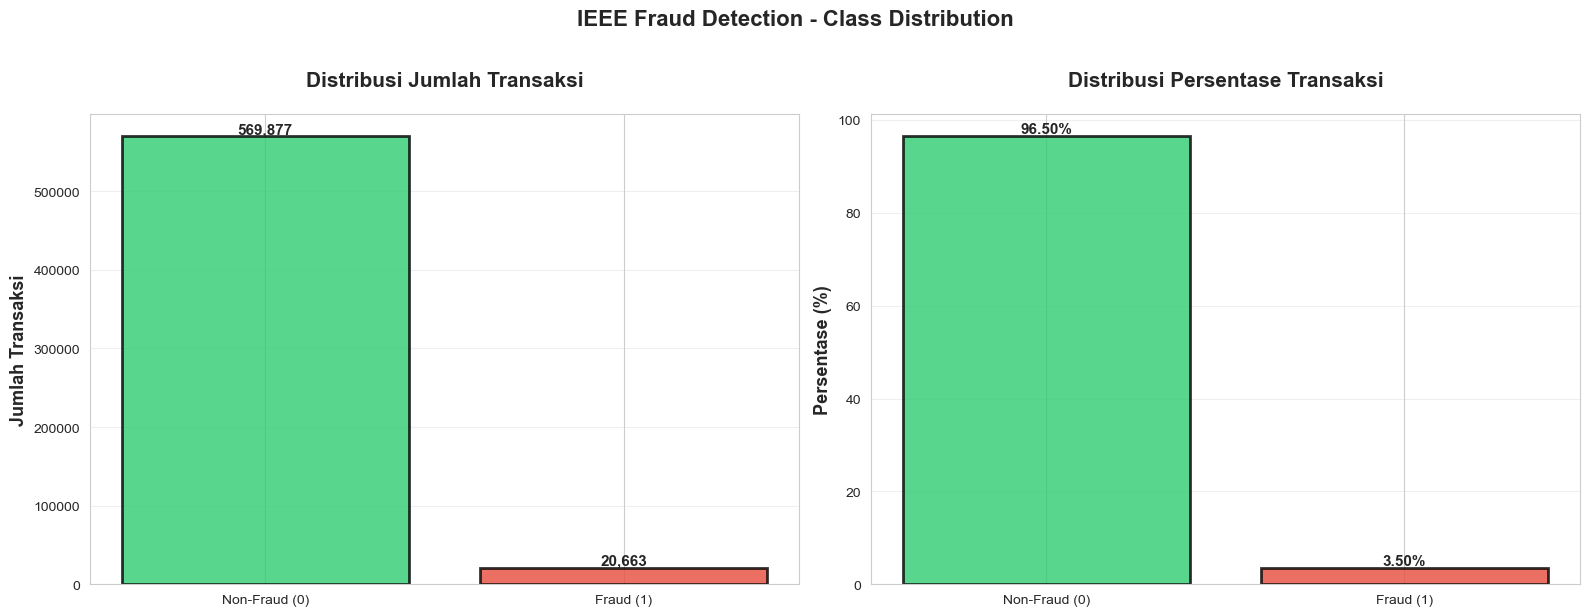

In [14]:
# Cell 6: Bar Chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

colors = ['#2ecc71', '#e74c3c']  # Green for non-fraud, Red for fraud
labels_text = ['Non-Fraud (0)', 'Fraud (1)']

# Chart 1: Jumlah absolut
bars1 = ax1.bar(labels_text, 
                class_counts.values, 
                color=colors, 
                edgecolor='black', 
                linewidth=2,
                alpha=0.8)

ax1.set_ylabel('Jumlah Transaksi', fontsize=13, fontweight='bold')
ax1.set_title('Distribusi Jumlah Transaksi', fontsize=15, fontweight='bold', pad=20)
ax1.grid(axis='y', alpha=0.3)

# Format angka dengan koma
for bar, count in zip(bars1, class_counts.values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{count:,}',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

# Chart 2: Persentase
bars2 = ax2.bar(labels_text, 
                class_percentages.values, 
                color=colors, 
                edgecolor='black', 
                linewidth=2,
                alpha=0.8)

ax2.set_ylabel('Persentase (%)', fontsize=13, fontweight='bold')
ax2.set_title('Distribusi Persentase Transaksi', fontsize=15, fontweight='bold', pad=20)
ax2.grid(axis='y', alpha=0.3)

for bar, pct in zip(bars2, class_percentages.values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{pct:.2f}%',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.suptitle('IEEE Fraud Detection - Class Distribution', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

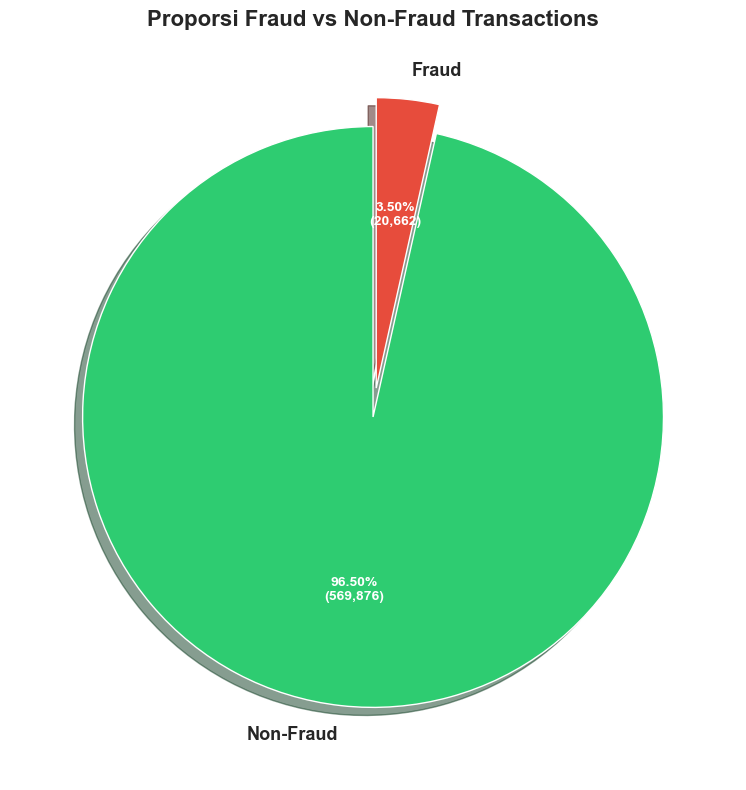

In [15]:
# Cell 7: Pie Chart
fig, ax = plt.subplots(figsize=(10, 8))

colors = ['#2ecc71', '#e74c3c']
explode = [0, 0.1]  # Highlight fraud class

wedges, texts, autotexts = ax.pie(
    class_counts.values,
    labels=['Non-Fraud', 'Fraud'],
    autopct=lambda pct: f'{pct:.2f}%\n({int(pct/100*total_samples):,})',
    colors=colors,
    startangle=90,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

# Styling
for i, autotext in enumerate(autotexts):
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

for text in texts:
    text.set_fontsize(13)
    text.set_fontweight('bold')

ax.set_title('Proporsi Fraud vs Non-Fraud Transactions', 
             fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

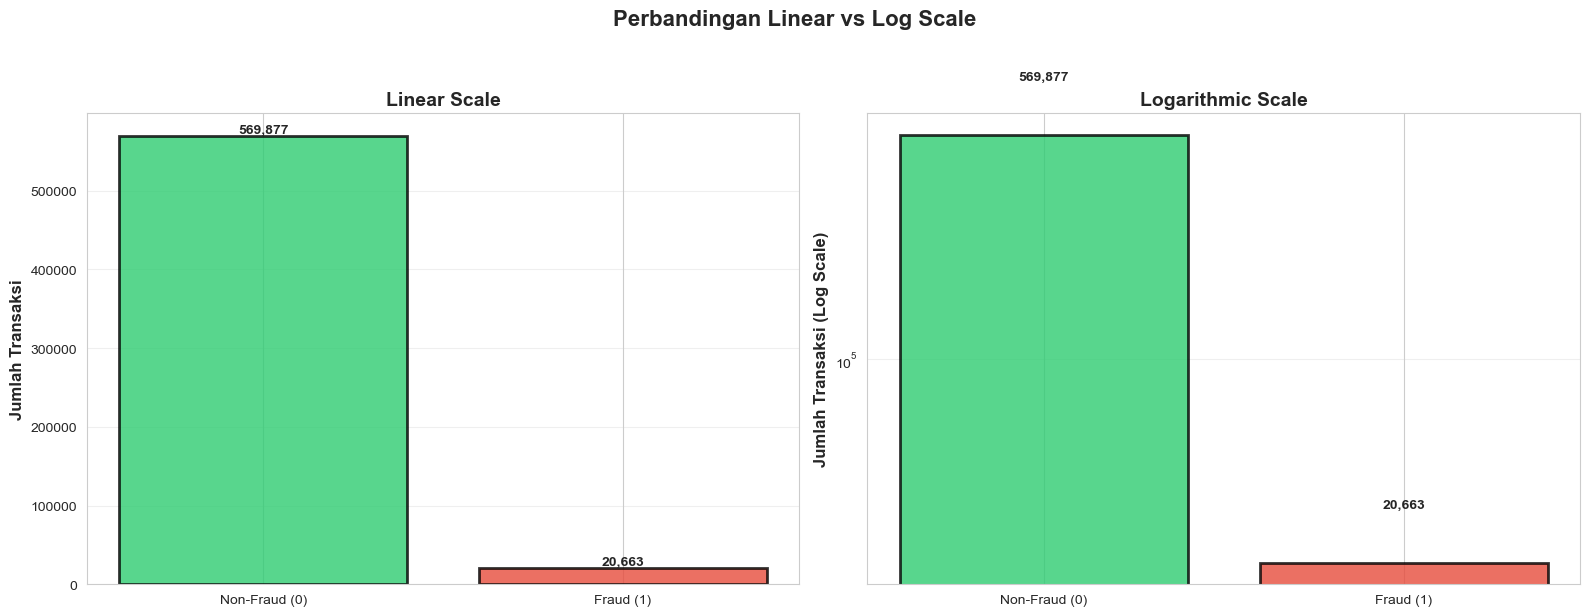

In [16]:
# Cell 8: Bar Chart dengan Log Scale
# Ini penting untuk melihat kelas minoritas dengan jelas!

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

labels_text = ['Non-Fraud (0)', 'Fraud (1)']
colors = ['#2ecc71', '#e74c3c']

# Chart 1: Linear Scale
bars1 = ax1.bar(labels_text, class_counts.values, color=colors, 
                edgecolor='black', linewidth=2, alpha=0.8)
ax1.set_ylabel('Jumlah Transaksi', fontsize=12, fontweight='bold')
ax1.set_title('Linear Scale', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

for bar, count in zip(bars1, class_counts.values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{count:,}', ha='center', va='bottom', fontweight='bold')

# Chart 2: Log Scale (Lebih mudah membandingkan!)
bars2 = ax2.bar(labels_text, class_counts.values, color=colors, 
                edgecolor='black', linewidth=2, alpha=0.8)
ax2.set_ylabel('Jumlah Transaksi (Log Scale)', fontsize=12, fontweight='bold')
ax2.set_title('Logarithmic Scale', fontsize=14, fontweight='bold')
ax2.set_yscale('log')
ax2.grid(axis='y', alpha=0.3)

for bar, count in zip(bars2, class_counts.values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height * 1.5,
            f'{count:,}', ha='center', va='bottom', fontweight='bold')

plt.suptitle('Perbandingan Linear vs Log Scale', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

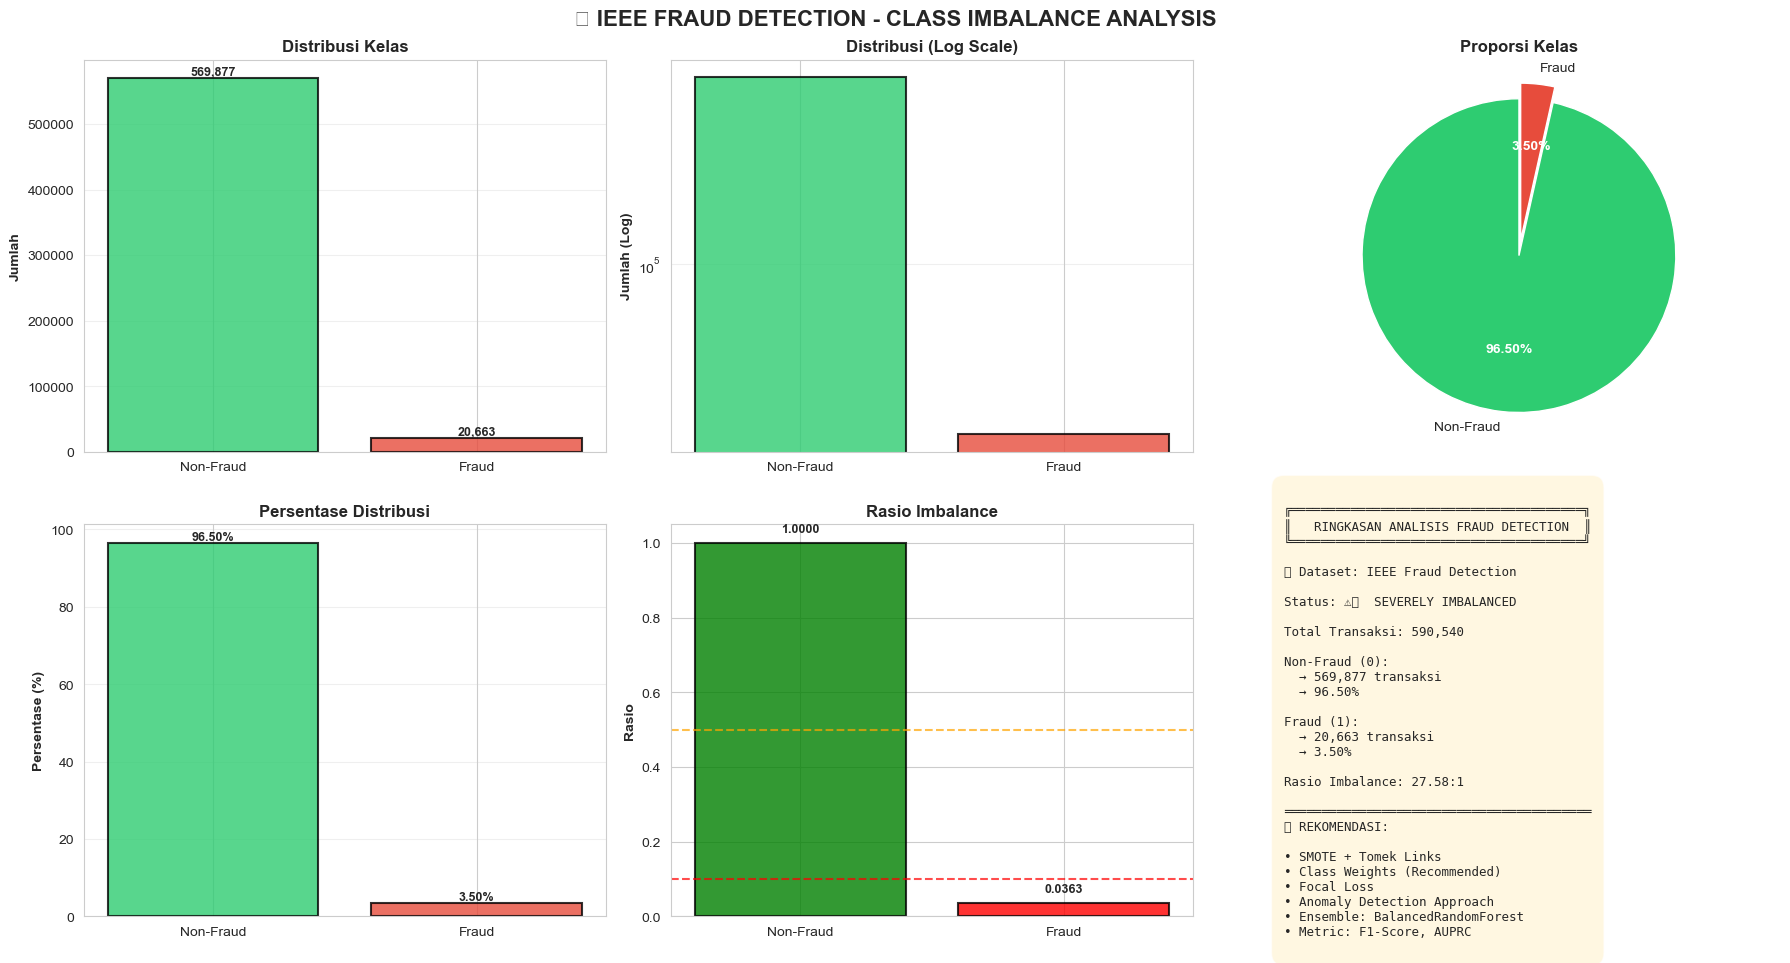

In [17]:
# Cell 9: Dashboard Komprehensif
fig = plt.figure(figsize=(18, 10))

colors = ['#2ecc71', '#e74c3c']
labels_text = ['Non-Fraud', 'Fraud']

# 1. Bar Chart (Linear)
ax1 = plt.subplot(2, 3, 1)
bars1 = ax1.bar(labels_text, class_counts.values, color=colors, 
                edgecolor='black', linewidth=1.5, alpha=0.8)
ax1.set_ylabel('Jumlah', fontweight='bold')
ax1.set_title('Distribusi Kelas', fontweight='bold', fontsize=12)
ax1.grid(axis='y', alpha=0.3)
for bar, count in zip(bars1, class_counts.values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{count:,}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 2. Bar Chart (Log Scale)
ax2 = plt.subplot(2, 3, 2)
bars2 = ax2.bar(labels_text, class_counts.values, color=colors, 
                edgecolor='black', linewidth=1.5, alpha=0.8)
ax2.set_ylabel('Jumlah (Log)', fontweight='bold')
ax2.set_title('Distribusi (Log Scale)', fontweight='bold', fontsize=12)
ax2.set_yscale('log')
ax2.grid(axis='y', alpha=0.3)

# 3. Pie Chart
ax3 = plt.subplot(2, 3, 3)
wedges, texts, autotexts = ax3.pie(class_counts.values, labels=labels_text,
                                     autopct='%1.2f%%', colors=colors,
                                     startangle=90, explode=[0, 0.1])
ax3.set_title('Proporsi Kelas', fontweight='bold', fontsize=12)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# 4. Persentase Bar
ax4 = plt.subplot(2, 3, 4)
bars4 = ax4.bar(labels_text, class_percentages.values, color=colors,
                edgecolor='black', linewidth=1.5, alpha=0.8)
ax4.set_ylabel('Persentase (%)', fontweight='bold')
ax4.set_title('Persentase Distribusi', fontweight='bold', fontsize=12)
ax4.grid(axis='y', alpha=0.3)
for bar, pct in zip(bars4, class_percentages.values):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{pct:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 5. Rasio Imbalance
ax5 = plt.subplot(2, 3, 5)
ratios = class_counts / class_counts.max()
colors_ratio = ['green', 'red']
bars5 = ax5.bar(labels_text, ratios.values, color=colors_ratio,
                edgecolor='black', linewidth=1.5, alpha=0.8)
ax5.set_ylabel('Rasio', fontweight='bold')
ax5.set_title('Rasio Imbalance', fontweight='bold', fontsize=12)
ax5.axhline(y=0.5, color='orange', linestyle='--', linewidth=1.5, alpha=0.7)
ax5.axhline(y=0.1, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
for bar, ratio in zip(bars5, ratios.values):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{ratio:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 6. Summary
ax6 = plt.subplot(2, 3, 6)
ax6.axis('off')

summary = f"""
╔═══════════════════════════════════════╗
║   RINGKASAN ANALISIS FRAUD DETECTION  ║
╚═══════════════════════════════════════╝

📊 Dataset: IEEE Fraud Detection

Status: {'⚠️  SEVERELY IMBALANCED' if is_imbalanced else '✅ BALANCED'}

Total Transaksi: {total_samples:,}

Non-Fraud (0):
  → {class_counts[0]:,} transaksi
  → {class_percentages[0]:.2f}%

Fraud (1):
  → {class_counts[1]:,} transaksi
  → {class_percentages[1]:.2f}%

Rasio Imbalance: {imbalance_ratio:.2f}:1

{'═' * 41}
🎯 REKOMENDASI:

• SMOTE + Tomek Links
• Class Weights (Recommended)
• Focal Loss
• Anomaly Detection Approach
• Ensemble: BalancedRandomForest
• Metric: F1-Score, AUPRC
"""

ax6.text(0.05, 0.5, summary, fontsize=9, family='monospace',
         verticalalignment='center',
         bbox=dict(boxstyle='round', facecolor='#fff3cd', alpha=0.6, pad=1))

plt.suptitle('📊 IEEE FRAUD DETECTION - CLASS IMBALANCE ANALYSIS', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()